### Dataset Information
UrbanSound is an audio classification dataset containing 10 classes in total, represented by real-value numbers as such:
{0: 'air_conditioner', 
1: 'car_horn', 
2: 'children_playing', 
3: 'dog_bark', 
4: 'drilling', 
5:'engine_idling',
6: 'gun_shot', 
7:'jackhammer',
 8: 'siren', 
 9: 'street_music'}

Each audio is of variable length. The training and testing datasets have 1700 and 800 audio samples respectively, with class names randomly distributed and not equally represented. Class names are mentioned in the audio file names.

The dataset indicates that there are some misclassifications in the dataset, to provide general noise which must be accounted for.

Project available at https://github.com/jasonmatthewsuhari/IT1244_UrbanSound


### Part I: Preparing Dependencies
This section goes over the external libraries that we will be using.

##### 1.1 - Installing Dependencies

##### 1.2 - Loading Dependencies

In [156]:
import os
import scipy
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import IPython.display as ipd # ref. online, to play audio
import librosa # converge signals from stereo to mono, represent an audio signal wrt to a normalised pattern (-1 to 1), converts/standardises sample rate
import librosa.display
from scipy.io import wavfile as wav

### Part II: Loading the Dataset
This section goes over how we load the dataset through Google Drive (tentative to change based on submission format), and also some minor debugging practices to manually check for any misclassifications.

The dataset itself is locally available, but it is best for us to read the dataset from a Google Drive for storage efficiency. For the initial setup of this notebook, we will be using the locally available data to avoid using GDrive API calls.

In [136]:
CLIENT_SECRET_FILE = 'client_secret.json'
API_NAME = 'drive'
API_VERSION = 'v3'
SCOPES = ['https://www.googleapis.com/auth/drive']

service = Create_Service(CLIENT_SECRET_FILE, API_NAME, API_VERSION, SCOPES)

In [ ]:
# if secret exposed on github, just push. it's a test oauth id
path_id = "178Hn4bAcib8DnlBjjCI2S_jVRD0ytktl"
query_str = f"parents = '{path_id}'"

response = service.files().list(q=query_str).execute()
files = response.get('files')
nextPageToken = response.get('nextPageToken')

while(nextPageToken != None):
    response = service.files().list(q=query_str).execute()
    nextPageToken = response.get('nextPageToken')

df = pd.DataFrame(files)
print(df['name'])

In [137]:
# demonstration of audio player
# will be converted to spectrogram, but this can be used to check for any misclass
ipd.Audio('data/Train/Train_1__dog_bark.wav')

### Part III: Exploratory Data Analysis

##### Training data distribution

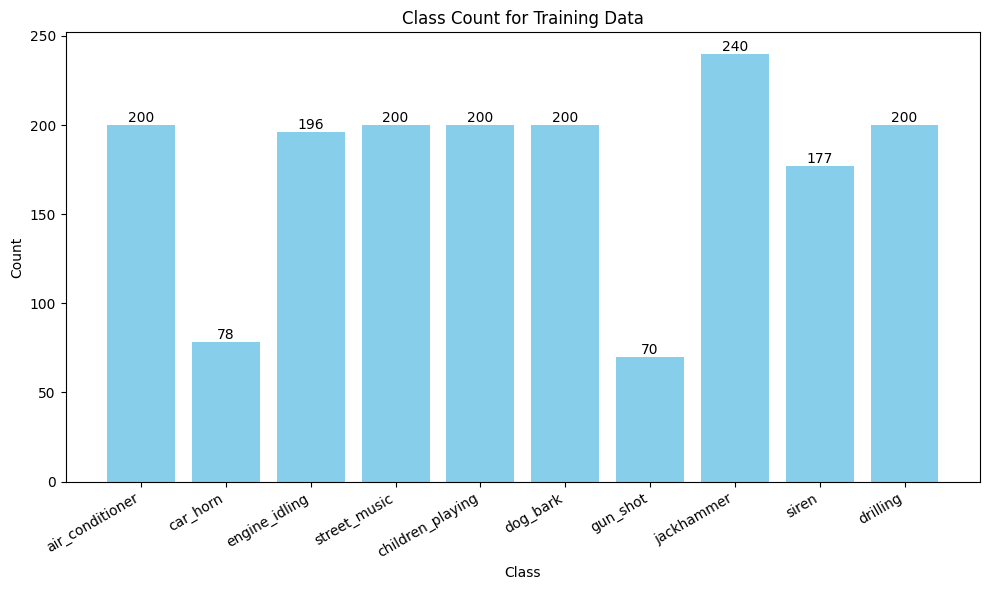

In [139]:
 # Check how imbalanced training data is
train_data_path = os.listdir('data/Train')
class_count = {}
for data in train_data_path:
    class_name = data.split('__')[1].split('.')[0]
    class_count[class_name] = class_count.get(class_name, 0) + 1

# Training data distribution graph
classes = class_count.keys()
counts = class_count.values()
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color='skyblue')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Count for Training Data')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Training data seems to be sufficiently balanced?

##### Waveform plots for each class

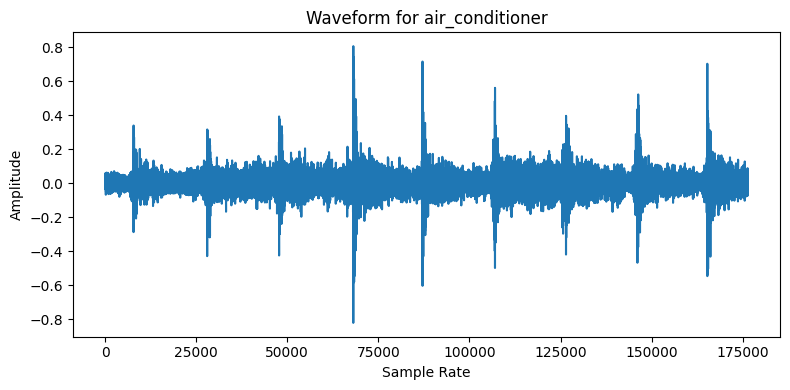

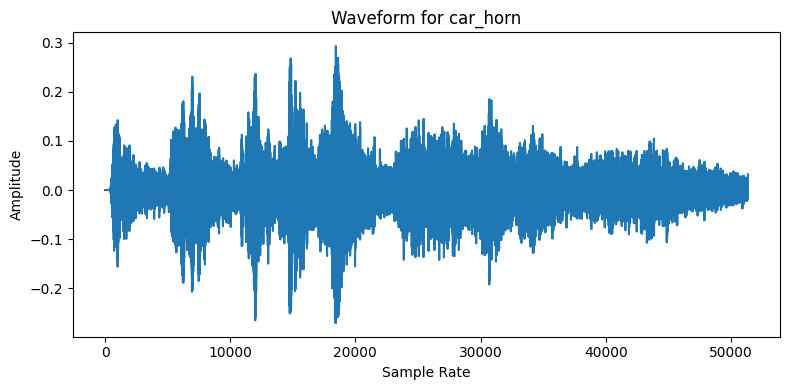

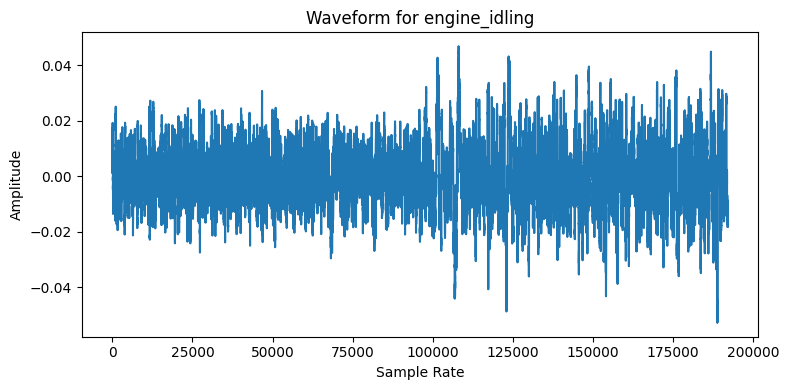

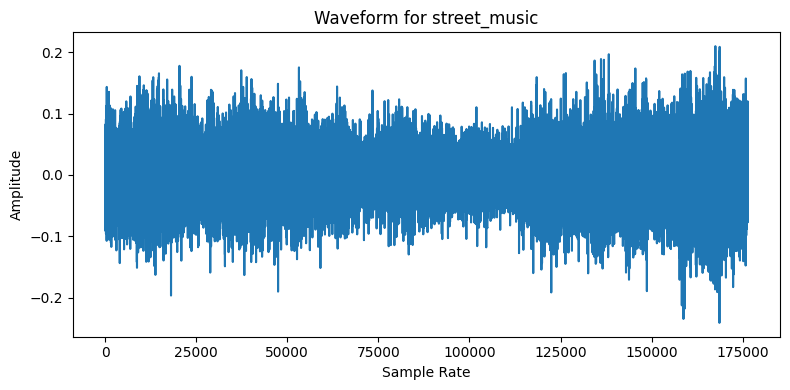

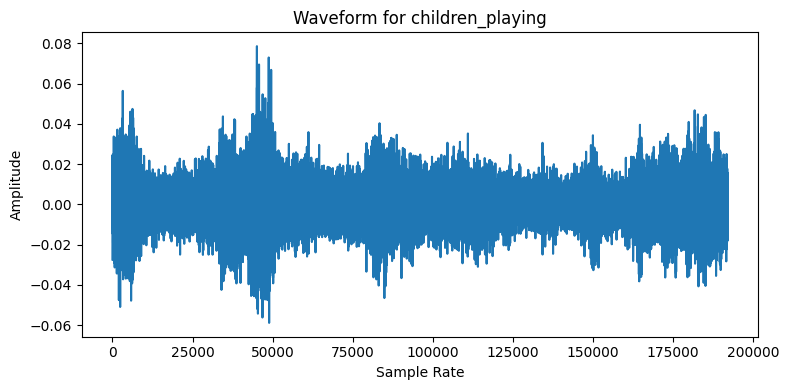

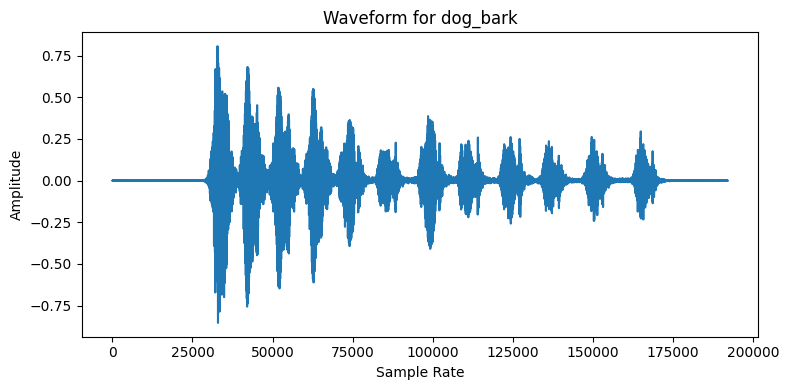

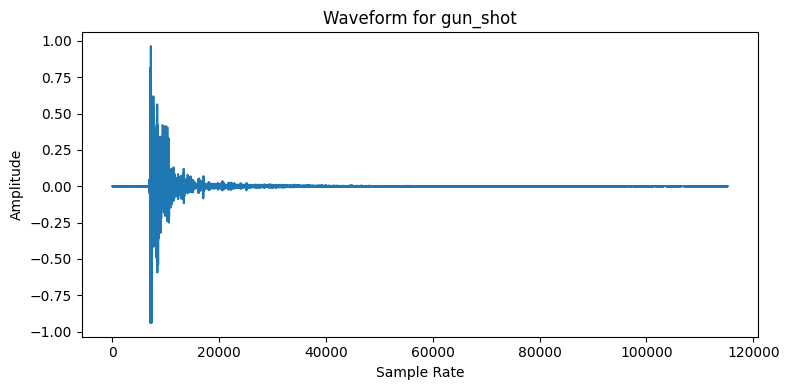

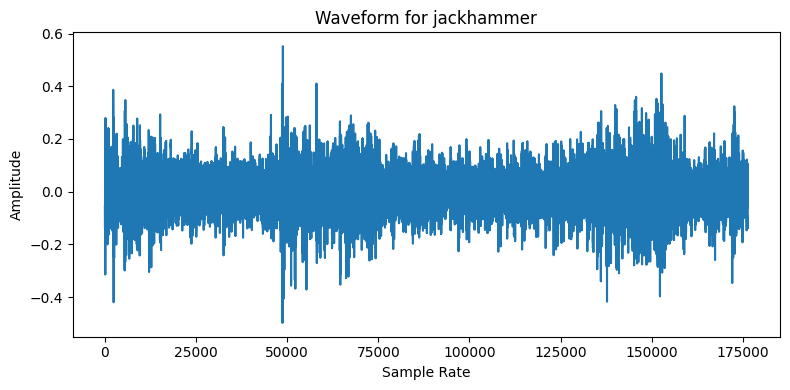

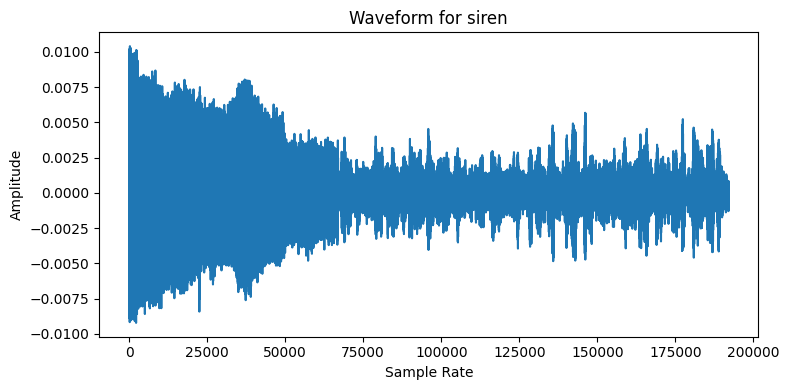

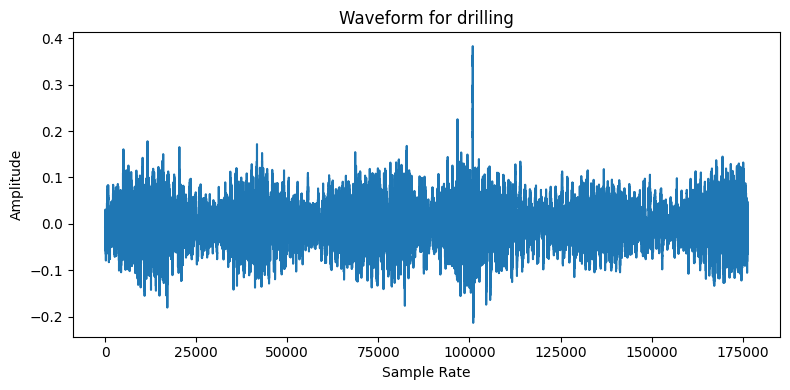

In [140]:

# Function to plot waveplot for a random audio sample in a class
def plot_waveform_for_class(class_name, files):
    plt.figure(figsize=(8, 4))
    plt.title(f'Waveform for {class_name}')
    
    # Choose a random file
    file = np.random.choice(files)
    
    # Load audio file
    audio_path = os.path.join('data/Train', file)
    waveform, sr = librosa.load(audio_path, sr=None)
    
    # Plot waveform
    plt.plot(waveform)
    plt.xlabel('Sample Rate')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Plot waveform for each class
for class_name in class_count.keys():
    # Get all files belonging to this class
    files = [file for file in train_data_path if class_name in file]
    # Plot waveform for this class
    plot_waveform_for_class(class_name, files)

##### Mono vs Stereo

[-5.8447593e-05  2.6010872e-05  3.4782410e-05 ...  2.2518770e-03
  2.8028022e-03  4.6307845e-03]
[[-20  14]
 [-18  16]
 [-16  19]
 ...
 [ 74 172]
 [116 185]
 [151 134]]


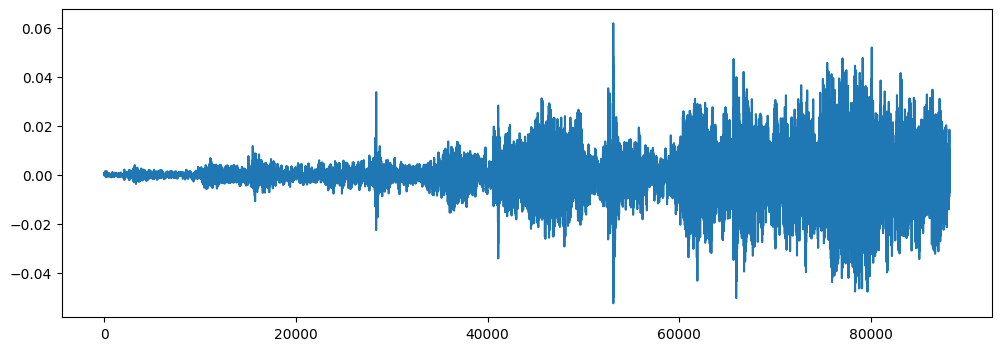

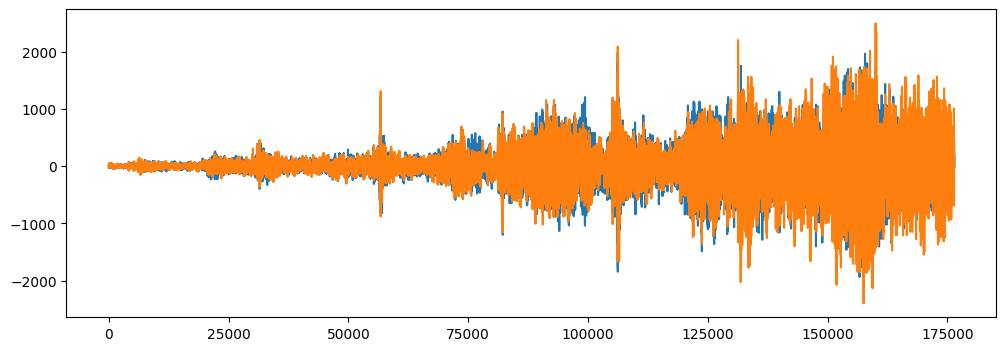

In [151]:
# Graphs for mono and stereo
audio_file_path = 'data/Train/Train_1544__street_music.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
print(librosa_audio_data) # mono

# Original audio with 1 channel (mono)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

wave_sample_rate, wave_audio = wav.read(audio_file_path)
print(wave_audio) # stereo

# Original audio with 2 channels (stereo)
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

##### Extracting Features: Mel-Frequency Cepstral Coefficients (MFCC)

In [157]:
# MFCC for one sample file
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

# MFCC for every training file

(40, 173)


### Part IV: Audio Classification Model

### Part V: Model Testing and Evaluation

### Part VI: Model Tuning